In [ ]:
# Install missing libraries if running fresh
!pip install seaborn scikit-learn matplotlib joblib


In [ ]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Save the model
import joblib

# Set style
sns.set_style('whitegrid')


In [4]:

from google.colab import files
uploaded = files.upload()


Saving housing_price_dataset.csv to housing_price_dataset (1).csv


In [13]:
from google.colab import files
uploaded = files.upload()

import io
import pandas as pd

# Get the actual key from the uploaded dictionary
file_name = list(uploaded.keys())[0]

# Use the actual file name to read the CSV
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
# Check the shape of dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

Saving housing_price_dataset.csv to housing_price_dataset (3).csv
Dataset contains 50000 rows and 6 columns.


In [19]:
df.info()
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_values)

missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data.sort_values(by='Percentage', ascending=False))

threshold = 30  # drop columns with more than 30% missing
cols_to_drop = missing_data[missing_data['Percentage'] > threshold].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {list(cols_to_drop)}")

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again if any missing values left
print("Missing values after filling:")
print(df.isnull().sum().sum())

# Check duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Remove duplicates if any
df = df.drop_duplicates()

# Reset index after dropping
df.reset_index(drop=True, inplace=True)

# Check updated shape
print(f"Dataset shape after cleaning: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB
Columns with missing values:
Series([], dtype: int64)
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
Dropped columns: []
Missing values after filling:
0
Number of duplicate rows: 0
Dataset shape after cleaning: (50000, 6)


<ipython-input-19-4459f3b8b85c>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-19-4459f3b8b85c>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

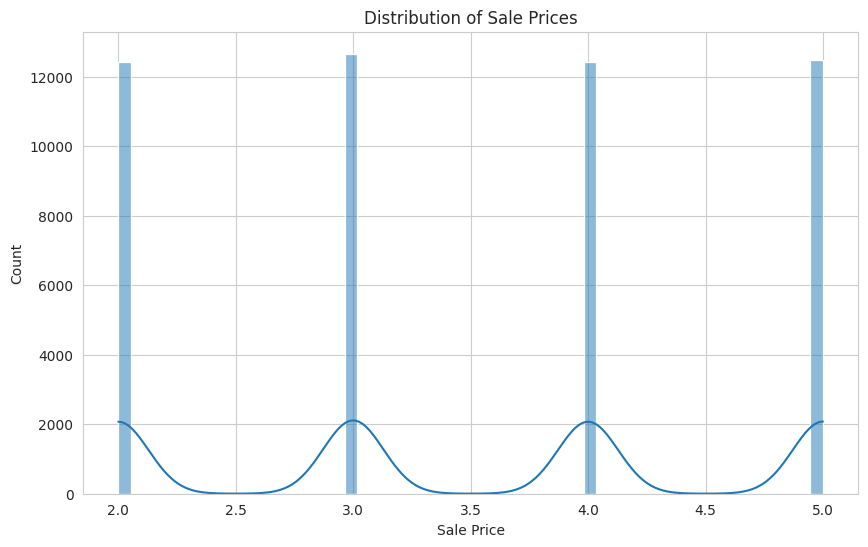

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df['Bedrooms'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.show()


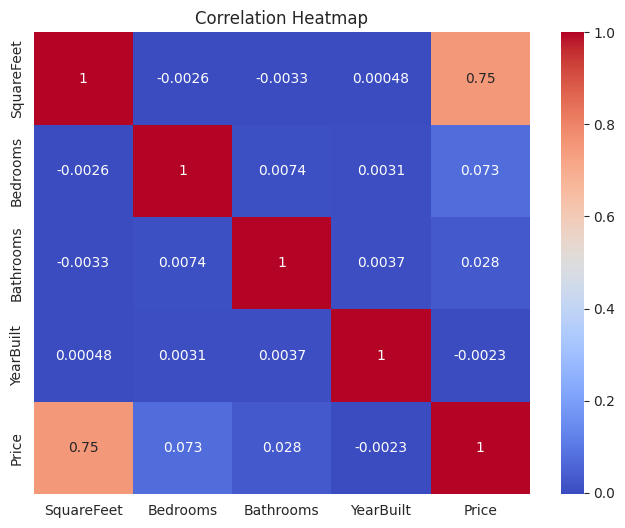

In [25]:
plt.figure(figsize=(8,6))
# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

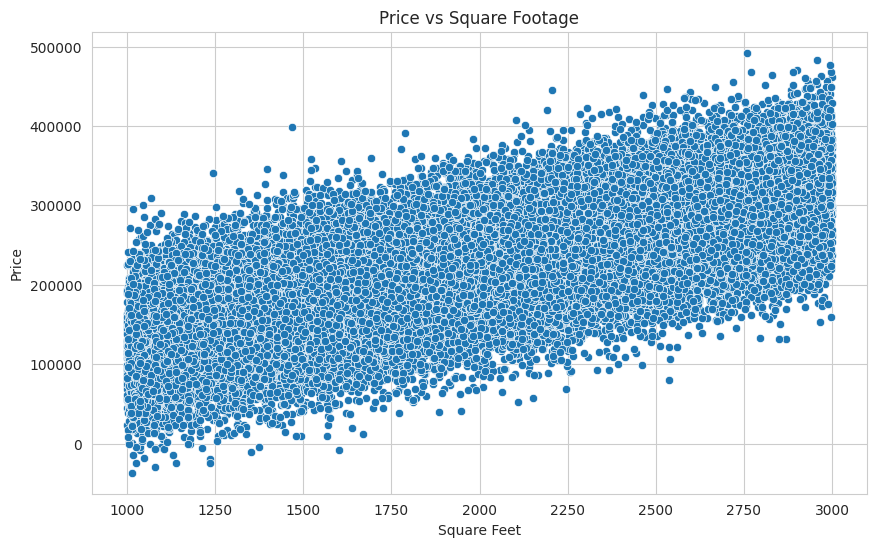

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SquareFeet', y='Price', data=df)
plt.title('Price vs Square Footage')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()


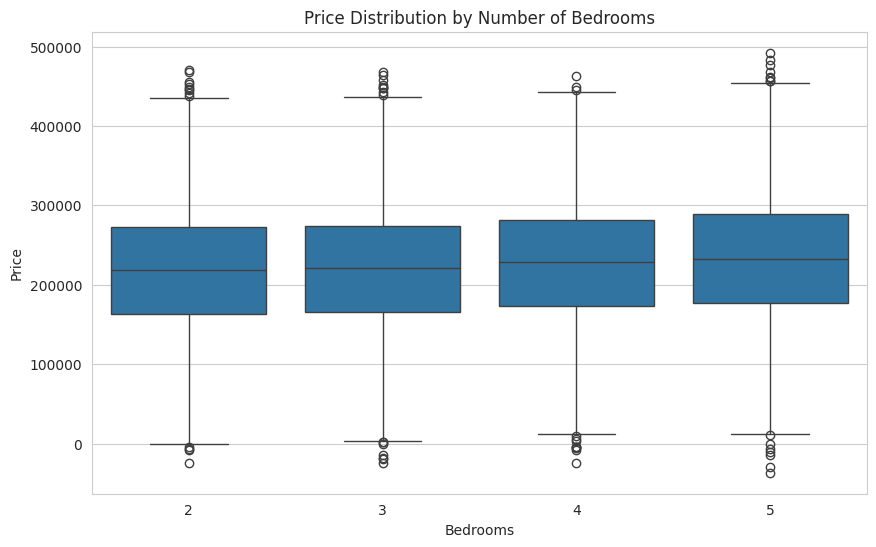

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()


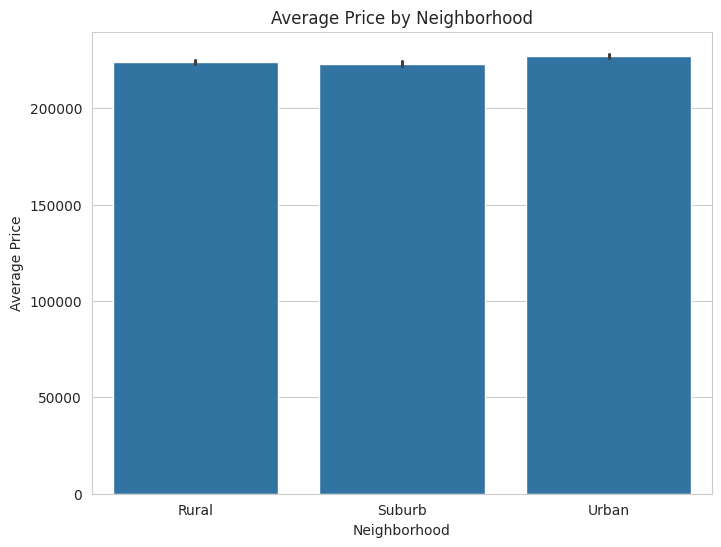

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(x='Neighborhood', y='Price', data=df, estimator=np.mean)
plt.title('Average Price by Neighborhood')
plt.ylabel('Average Price')
plt.xlabel('Neighborhood')
plt.show()


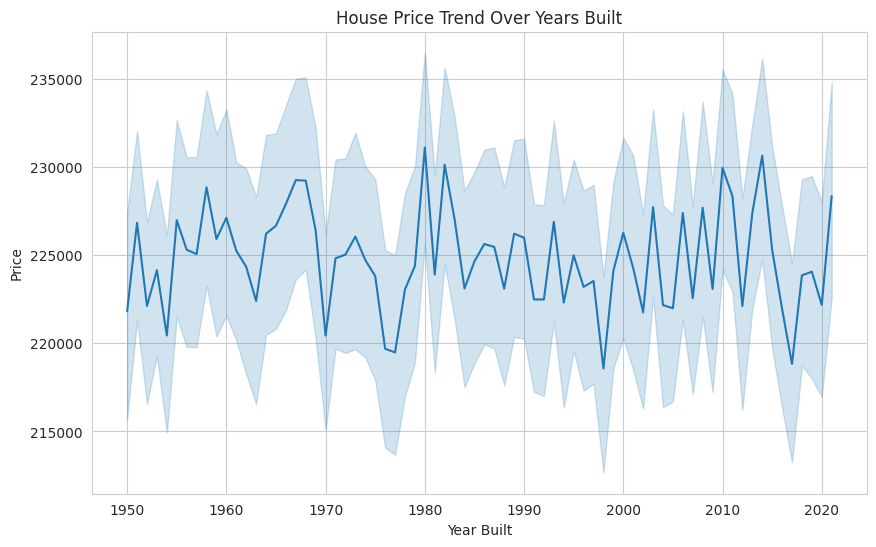

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(x='YearBuilt', y='Price', data=df.sort_values('YearBuilt'))
plt.title('House Price Trend Over Years Built')
plt.xlabel('Year Built')
plt.ylabel('Price')
plt.show()


In [30]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Identify categorical and numerical columns
categorical_cols = ['Neighborhood']
numerical_cols = ['SquareFeet', 'Bedrooms', 'Bathrooms', 'YearBuilt']

# Preprocessing: Scaling + Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Build a pipeline with preprocessing + model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
model_pipeline.fit(X_train, y_train)

# Predictions
y_pred = model_pipeline.predict(X_test)

# Evaluation Metrics
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

# Save the pipeline (for Streamlit app later)
joblib.dump(model_pipeline, 'housing_price_model.pkl')


MAE: 41852.076722355014
MSE: 2761282018.335892
RMSE: 52547.902130683506
R2 Score: 0.5189365062417076


['housing_price_model.pkl']

In [31]:
import joblib

# Save to file
joblib.dump(model_pipeline, 'housing_price_model.pkl')


['housing_price_model.pkl']

In [32]:
from google.colab import files
files.download('housing_price_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>